In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [66]:
df.shape

(962, 2)

## Exploring Categories

In [67]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

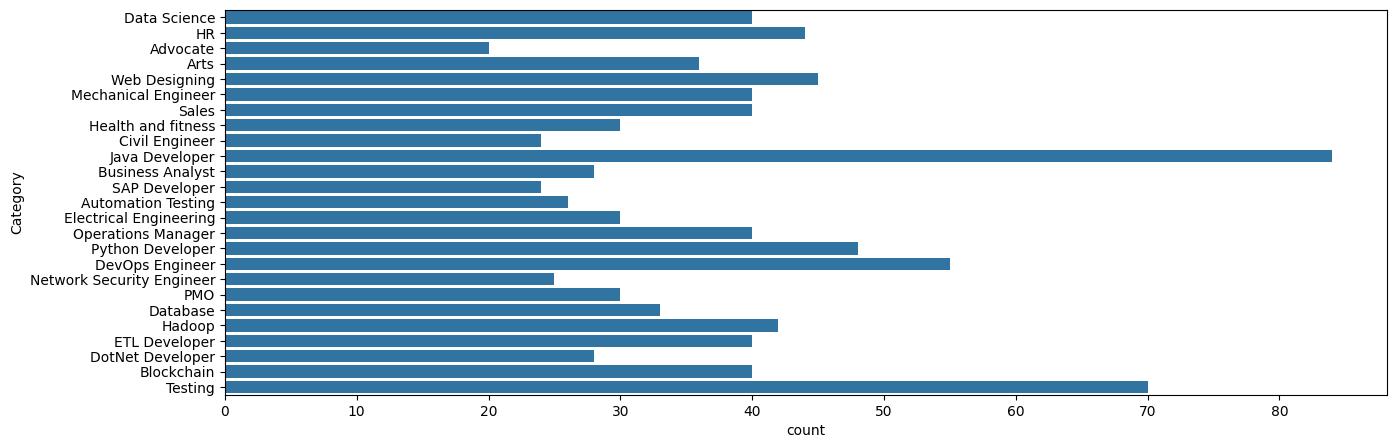

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [69]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x1d37e8125d0>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667635, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.053862303159734344, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178518, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.0745481947062527, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.0485773817141402, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317762, 'SAP Developer'),
  Text(-0.7427816407083776, -0.8113417493427605, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600295, 'Electrical Engineering'),
  Text(-0.2910572162881381

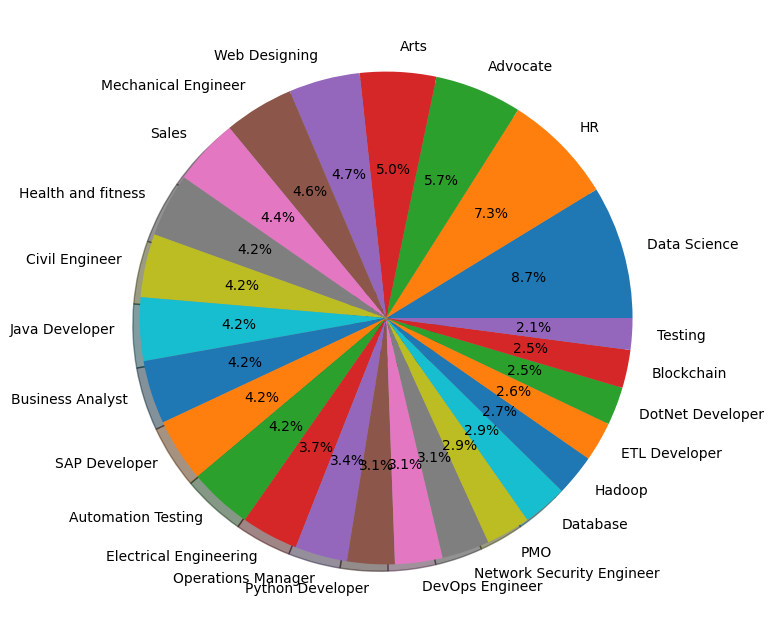

In [70]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(10,8))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)

## Exploring resume

In [71]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [72]:
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+|www\.\S+', ' ', txt)
    cleanText = re.sub(r'\b(RT|cc)\b', ' ', cleanText)
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    cleanText = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@\[\\\]^_`{|}~]', ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7F]+', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    
    return cleanText


In [73]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [74]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

## words to categorical values

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

## Vactorization

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_txt=tfidf.transform(df['Resume'])

## Splitting with train test split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(required_txt, df['Category'], test_size=0.2, random_state=42)

## Now lets train the model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

98.44559585492227


# Prediction system

In [ ]:
def pred(input_resume):
    cleaned_text = cleanResume(input_resume)  # Clean Input Text
    
    vectorized_text = tfidf.transform([cleaned_text])  # Convert to TF-IDF
    
    predicted_category = clf.predict(vectorized_text)  # Predict
    
    predicted_category_name = le.inverse_transform(predicted_category)  # Convert to Category Name
    return predicted_category_name[0]

In [ ]:
myresume = """I am a data scientist specializing in machine learning, deep learning, and AI. 
           I have extensive experience with Python, TensorFlow, PyTorch, and NLP. 
          I am proficient in building deep learning models and deploying them in real-world applications."""
print("Predicted Category:", pred(myresume))

Predicted Category: Data Science
